# *Neural Systems, Neural Networks, and Behavior: Unit I Final Project* 

### **Group 2: Faisal Anwar, Caitlyn Talley, Taylor Baugher, Rosario Reyes, and Marisa Brito**

2. (a)
   ##### Below is our code for a <U> leaky integrate and fire model <U> :

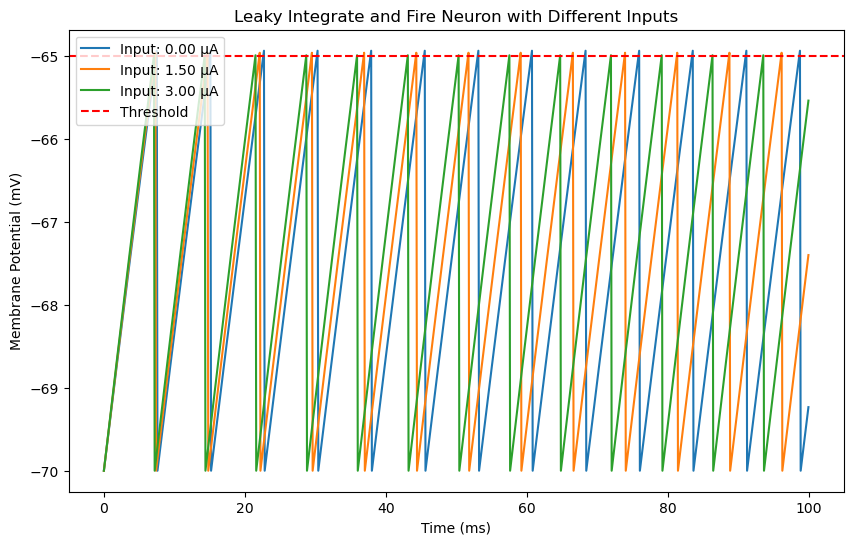

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_integrate_and_fire(current_input, membrane_time_constant, threshold, reset_voltage, simulation_time, dt):
    time_points = np.arange(0, simulation_time, dt)
    membrane_potential = np.zeros_like(time_points)
    spike_times = []

    for i, t in enumerate(time_points):
        if membrane_potential[i-1] >= threshold:
            membrane_potential[i] = reset_voltage
            spike_times.append(t)
        else:
            membrane_potential[i] = membrane_potential[i-1] + (dt / membrane_time_constant) * (current_input - membrane_potential[i-1])

    return time_points, membrane_potential, spike_times

current_input_values = np.linspace(0,3,3)  # Different current inputs
membrane_time_constant = 100.0  # Time constant of the membrane
threshold_voltage = -65.0  # Membrane potential threshold for firing in mV
reset_voltage = -70.0  # Membrane potential reset value after firing in mV
simulation_time = 100  # Simulation time in milliseconds
dt = 0.1  # Time step in milliseconds

plt.figure(figsize=(10, 6))

for current_input in current_input_values:
    time_points, membrane_potential, spike_times = leaky_integrate_and_fire(current_input, membrane_time_constant, threshold_voltage, reset_voltage, simulation_time, dt)
    plt.plot(time_points, membrane_potential, label=f'Input: {current_input:.2f} μA')

plt.title('Leaky Integrate and Fire Neuron with Different Inputs')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.axhline(y=threshold_voltage, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()





2. (b)
   ##### Below is our code and plot for the LIF model, but with a <u> voltage-gated sodium channel input <u> added:



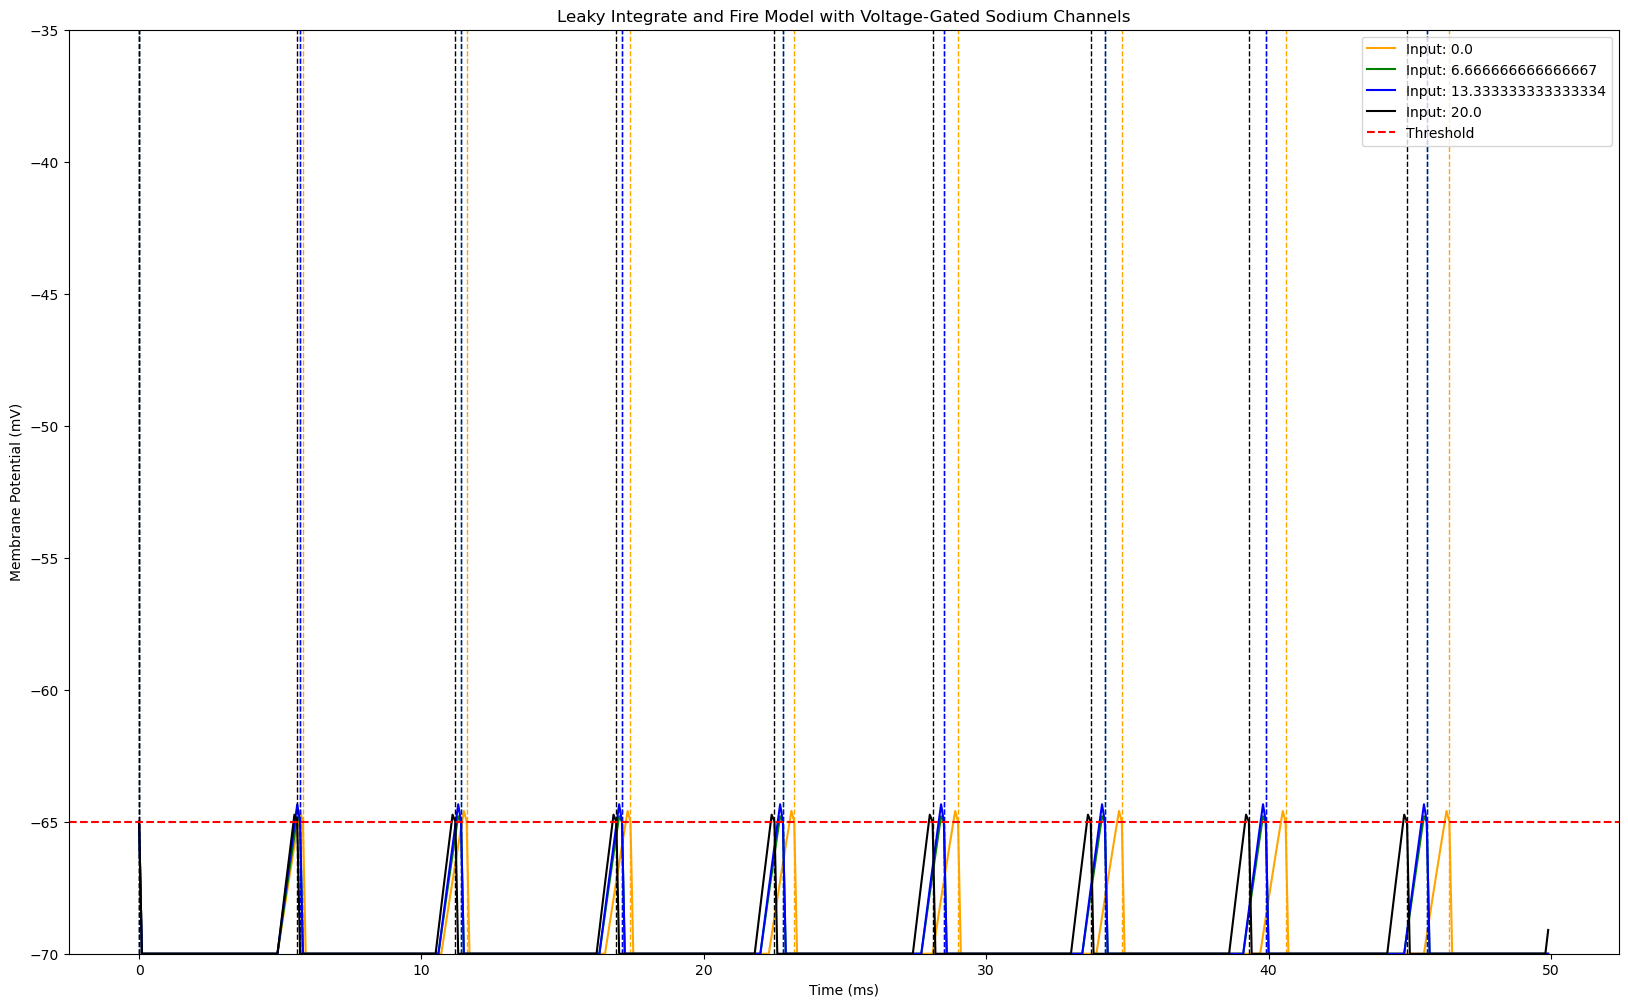

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_integrate_and_fire(current_input, membrane_time_constant, threshold_voltage, reset_voltage, simulation_time, dt, sodium_channel_threshold, refractory_period):
    time_points = np.arange(0, simulation_time, dt)
    membrane_potential = np.zeros_like(time_points)
    spike_times = []
    last_spike_time = -refractory_period

    for i, t in enumerate(time_points):
        if t - last_spike_time < refractory_period:
            membrane_potential[i] = reset_voltage
        elif membrane_potential[i-1] >= threshold_voltage:
            membrane_potential[i] = threshold_voltage
            spike_times.append(t)
            last_spike_time = t
        else:
            # Calculate sodium current contribution
            sodium_current = 0.0
            if membrane_potential[i-1] >= sodium_channel_threshold:
                sodium_current = 20.0  # Arbitrary value representing sodium current

            # Update membrane potential with sodium current
            membrane_potential[i] = membrane_potential[i-1] + (dt / membrane_time_constant) * (current_input - membrane_potential[i-1] + sodium_current)

            # Clip membrane potential to a maximum value of 1 volt
            membrane_potential[i] = min(membrane_potential[i], 1.0)

    return time_points, membrane_potential, spike_times

# Define parameters
current_input_values = np.linspace(0, 20, 4)  # Different current inputs
membrane_time_constant = 10.0  # Time constant of the membrane
threshold_voltage = -65  # Membrane potential threshold for firing
reset_voltage = -70  # Membrane potential reset value after firing
simulation_time = 50  # Simulation time in milliseconds
dt = 0.1  # Time step in milliseconds
sodium_channel_threshold = -65  # Threshold for opening sodium channels
refractory_period = 5  # Duration of the refractory period in milliseconds

plt.figure(figsize=(20, 12))

# Define colors
colors = ['orange', 'green','blue', 'black']

# Plot membrane potentials for each current input
for i, current_input in enumerate(current_input_values):
    time_points, membrane_potential, spike_times = leaky_integrate_and_fire(current_input, membrane_time_constant, threshold_voltage, reset_voltage, simulation_time, dt, sodium_channel_threshold, refractory_period)
    plt.plot(time_points, membrane_potential, label=f'Input: {current_input}', color=colors[i])

    # Plot action potentials as vertical lines with the same color as current input lines
    for spike_time in spike_times:
        plt.axvline(x=spike_time, color=colors[i], linestyle='--', linewidth=1)

plt.title('Leaky Integrate and Fire Model with Voltage-Gated Sodium Channels')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.axhline(y=threshold_voltage, color='r', linestyle='--', label='Threshold')
plt.ylim([-70, -35])  
plt.legend()
plt.show()


2. (c)
   ##### Below is our code and a plot for a <u>simple feedforward ANN<u>:

   By changing the input_current from 1 to -1, you can see that the raster plot will appear either with "spikes", or dots, and then with nothing when -1 is inputted. This is because the current must drive voltage above the threshold for an action potential to fire, or for a dot to appear. You can also change the rate at which neuron A fires and adjust the delay it takes for neuron B and C to respond to their inputs.

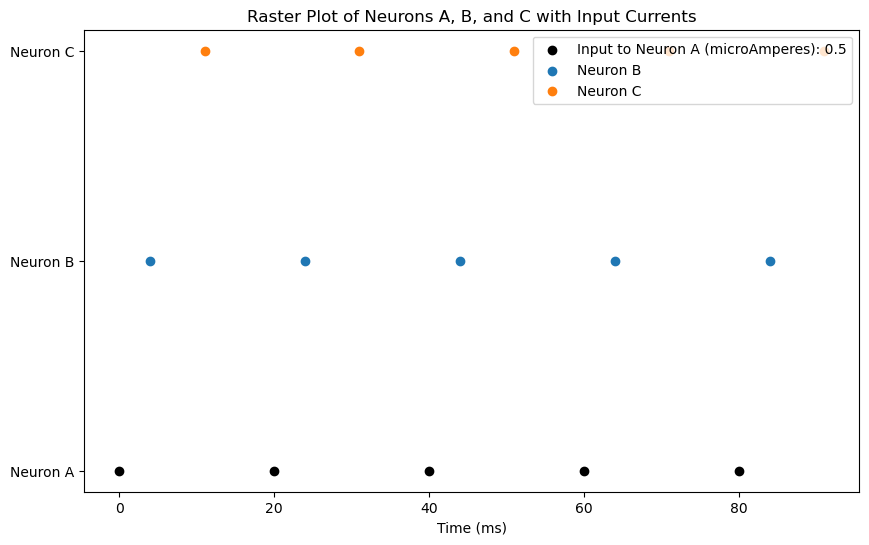

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
time_steps = 1000
dt = 0.1
rate_neuron_A = 50  # Firing rate of neuron A (Hz)
weight_A_to_B = 0.1
weight_B_to_C = 0.2
time_delay_B = 40  # Time delay for neuron B (in ms)
time_delay_C = 70  # Time delay for neuron C (in time steps)

# Define arrays to store spikes
spikes_A = np.zeros(time_steps)
spikes_B = np.zeros(time_steps)
spikes_C = np.zeros(time_steps)

# Input current to neuron A
input_current = 0.5

# Threshold for spike generation
threshold = 0.5

# Determine spike times for neuron A based on its firing rate
spike_times_A = np.arange(0, time_steps * dt, 1000 / rate_neuron_A)

# Generate spikes for neuron A based on input current
for spike_time in spike_times_A:
    spike_index = int(spike_time / dt)
    spikes_A[spike_index] = input_current

# Generate spikes for neuron B based on inputs from neuron A with time delay
for t in range(time_delay_B, time_steps):
    if spikes_A[t - time_delay_B] >= threshold:
        spikes_B[t] = 1

# Generate spikes for neuron C based on inputs from neuron B with time delay
for t in range(time_delay_C, time_steps):
    if spikes_B[t - time_delay_C] >= threshold:
        spikes_C[t] = 1

# Create raster plot
plt.figure(figsize=(10, 6))
for i, spikes in enumerate([spikes_A, spikes_B, spikes_C]):
    spike_times = np.where(spikes >= threshold)[0] * dt
    neuron_labels = ['Neuron A', 'Neuron B', 'Neuron C']
    if i == 0:
        plt.scatter(spike_times, np.ones_like(spike_times) * i, label=f'Input to Neuron A (microAmperes): {input_current}', color='black')
    else:
        plt.scatter(spike_times, np.ones_like(spike_times) * i, label=neuron_labels[i])

plt.xlabel('Time (ms)')
plt.yticks([0, 1, 2], ['Neuron A', 'Neuron B', 'Neuron C'])
plt.title('Raster Plot of Neurons A, B, and C with Input Currents')
plt.legend()
plt.show()

3.
| **Model** | **Description** | **Benefits** | **Limitations** | **Information Processing Power**
|---|---|---|---|---|
|Simple LIF|Simplest model with leaky ion channels (leaky resistors) that does not fire an action potential|Allows us to monitor the voltage of a neuron, and it integrates multiple excitatory or inhibitory inputs|Cannot generate an AP or spike train because there are no VGSC (spike generators)| Limited
|LIF w/ VGSC|Same as the simple LIF model, but with VGSC to initiate the AP and create a spike train with refractory periods|Allows us to generate a spike train for a neuron|Can only model the firing behavior of one neuron, this is not useful in modeling systems| Large amounts of information processing power, but for one neuron
|Feedforward ANN|A model with more than one neuron; each neuron is sending an excitatory signal forward to the next; there is no feedback, so the signal only moves forward|Allows us to model the firing behavior of multiple neurons which is applicable in neural systems|Since there is no feedback, there is no corrective mechanism; we have to rely on the feedforward signals to be correct| The greatest amount of information processing power out of the three model described

4. ### What happens when inputs differ?



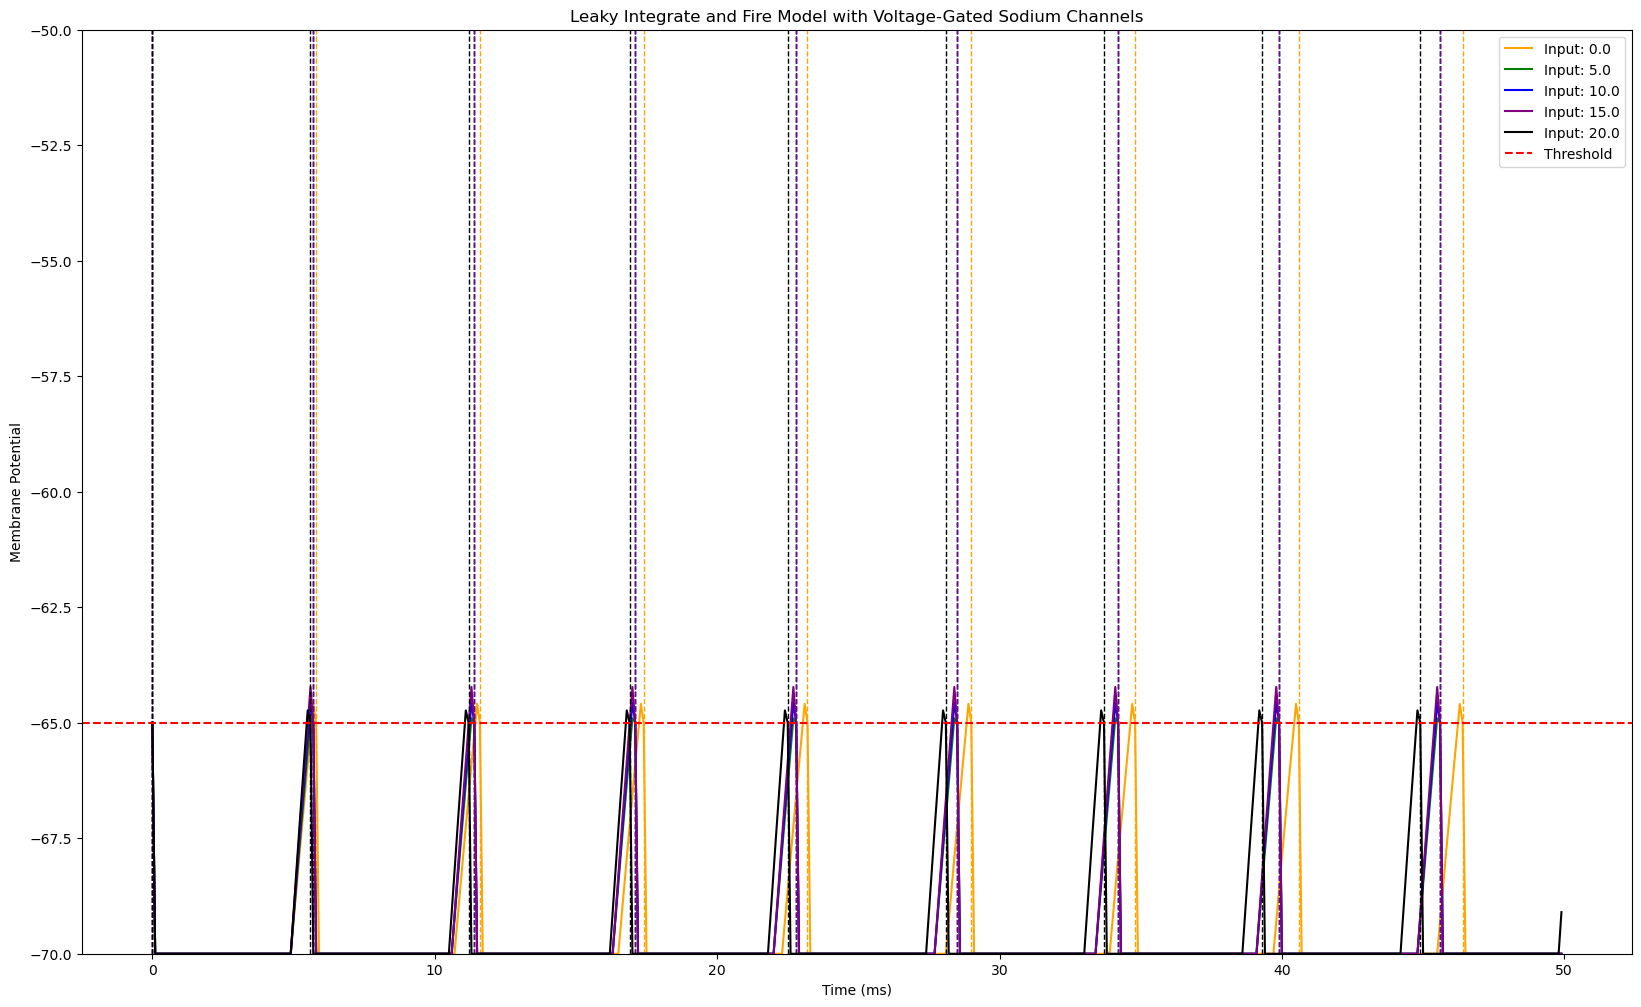

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_integrate_and_fire(current_input, membrane_time_constant, threshold_voltage, reset_voltage, simulation_time, dt, sodium_channel_threshold, refractory_period):
    time_points = np.arange(0, simulation_time, dt)
    membrane_potential = np.zeros_like(time_points)
    spike_times = []
    last_spike_time = -refractory_period

    for i, t in enumerate(time_points):
        if t - last_spike_time < refractory_period:
            membrane_potential[i] = reset_voltage
        elif membrane_potential[i-1] >= threshold_voltage:
            membrane_potential[i] = threshold_voltage
            spike_times.append(t)
            last_spike_time = t
        else:
            # Calculate sodium current contribution
            sodium_current = 0.0
            if membrane_potential[i-1] >= sodium_channel_threshold:
                sodium_current = 10.0  # Arbitrary value representing sodium current

            # Update membrane potential with sodium current
            membrane_potential[i] = membrane_potential[i-1] + (dt / membrane_time_constant) * (current_input - membrane_potential[i-1] + sodium_current)

            # Clip membrane potential to a maximum value of 1 volt
            membrane_potential[i] = min(membrane_potential[i], 1.0)

    return time_points, membrane_potential, spike_times

# Define parameters
current_input_values = np.linspace(0, 20, 5)  # Different current inputs
membrane_time_constant = 10.0  # Time constant of the membrane
threshold_voltage = -65  # Membrane potential threshold for firing
reset_voltage = -70 # Membrane potential reset value after firing
simulation_time = 50  # Simulation time in milliseconds
dt = 0.1  # Time step in milliseconds
sodium_channel_threshold = -65  # Threshold for opening sodium channels
refractory_period = 5  # Duration of the refractory period in milliseconds


plt.figure(figsize=(20, 12))

# Define colors
colors = ['orange', 'green', 'blue', 'purple', 'black']

# Plot membrane potentials for each current input
for i, current_input in enumerate(current_input_values):
    time_points, membrane_potential, spike_times = leaky_integrate_and_fire(current_input, membrane_time_constant, threshold_voltage, reset_voltage, simulation_time, dt, sodium_channel_threshold, refractory_period)
    plt.plot(time_points, membrane_potential, label=f'Input: {current_input}', color=colors[i])

    # Plot action potentials as vertical lines with the same color as current input lines
    for spike_time in spike_times:
        plt.axvline(x=spike_time, color=colors[i], linestyle='--', linewidth=1)

plt.title('Leaky Integrate and Fire Model with Voltage-Gated Sodium Channels')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.axhline(y=threshold_voltage, color='r', linestyle='--', label='Threshold')
plt.ylim([-70, -50])  # Limit y-axis to 1 volt
plt.legend()
plt.show()



Our original model, while it included different inputs, only had a vague sense of what happens when varying inputs are added to the model (see original model below):

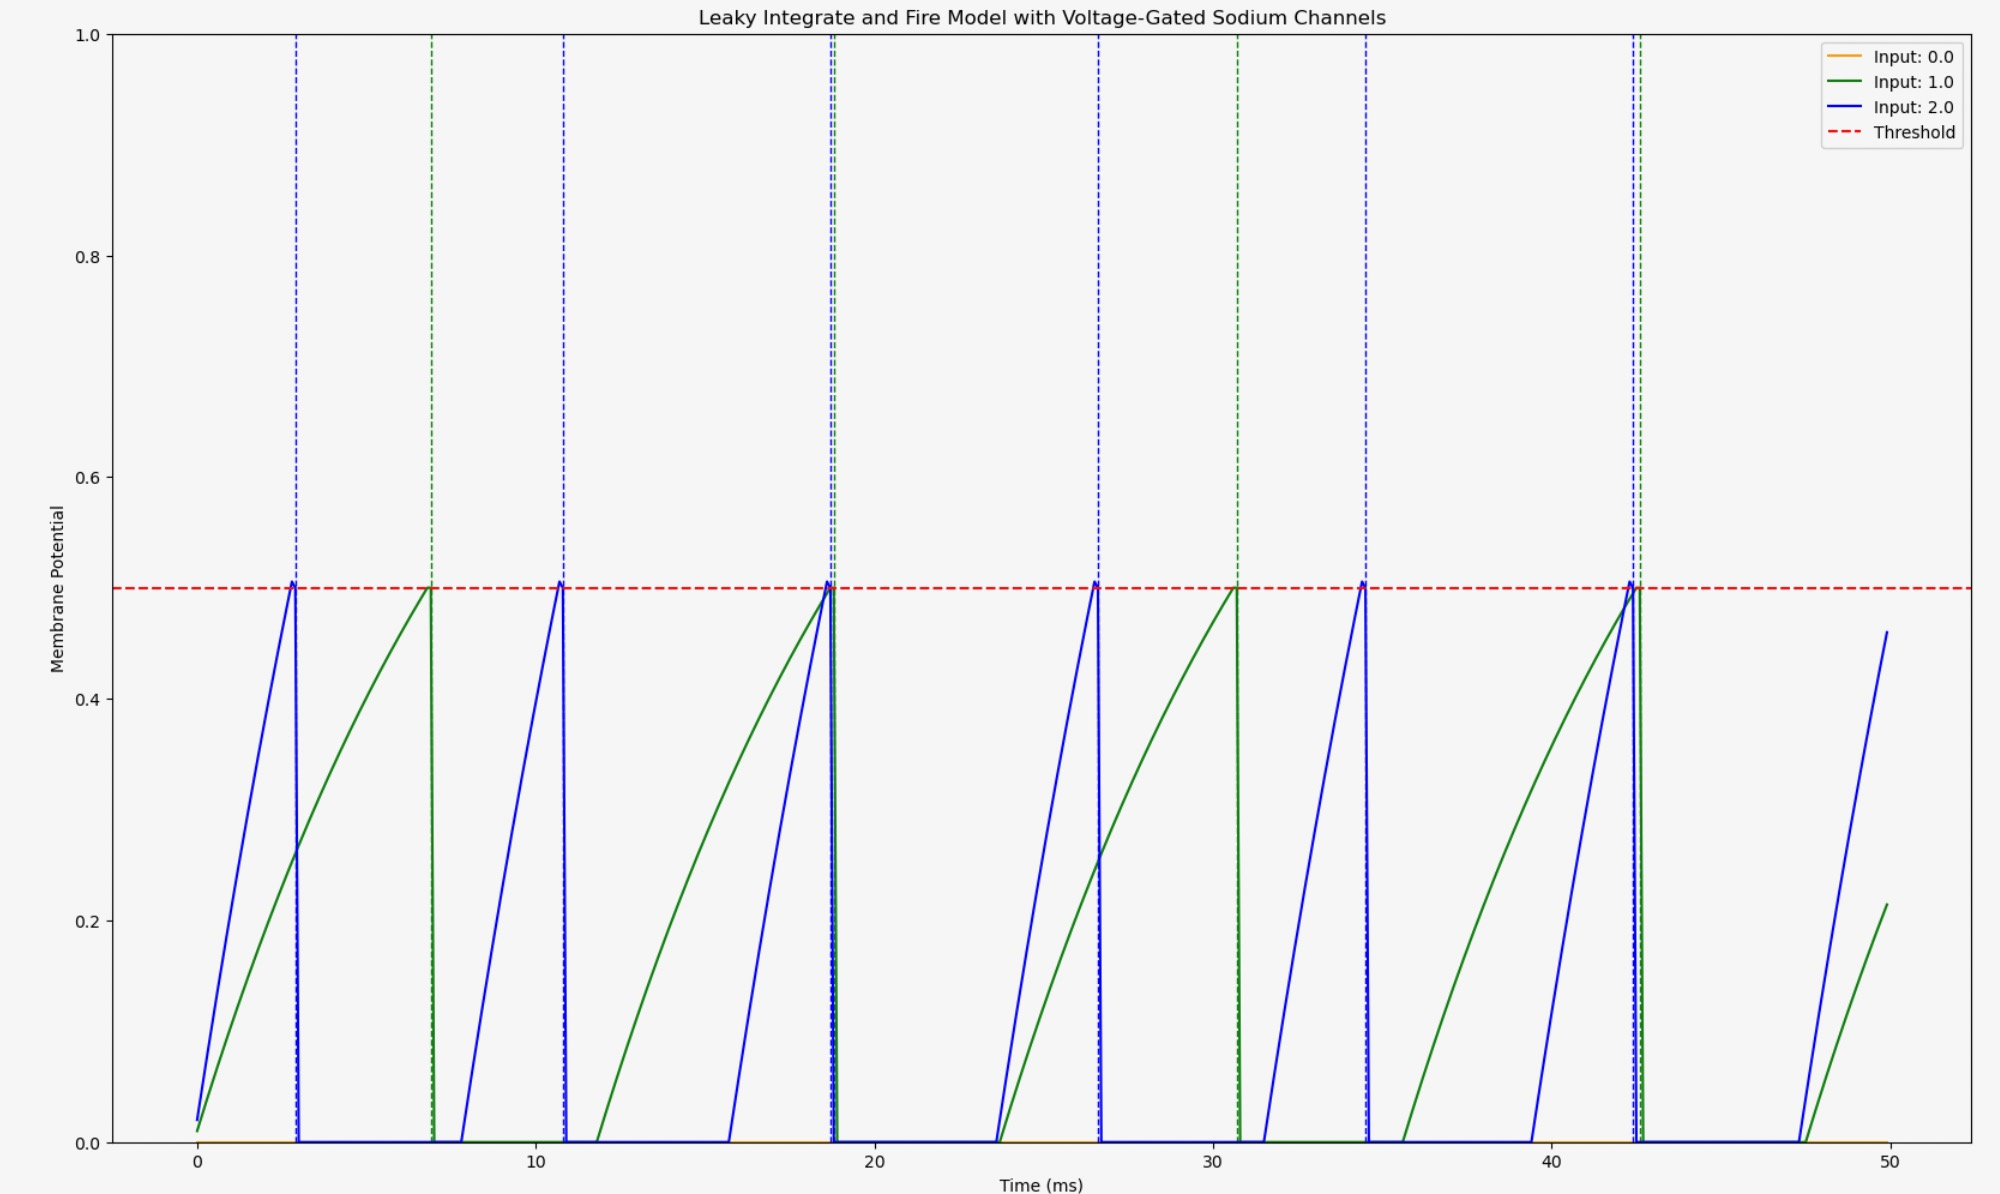

To achieve the new model, we modified the code to include different inputs. We did this by defining these inputs in the linsoace function, where it will generate different current inputs over a range of values in between defined intervals. Then a for loop takes each current value in the linspace function and plots how current is integrated into voltage and action potentials. We can see that by increasing the input current, the voltage threshold is reached faster.



5. ### What happens when inhibitory inputs are implemented?

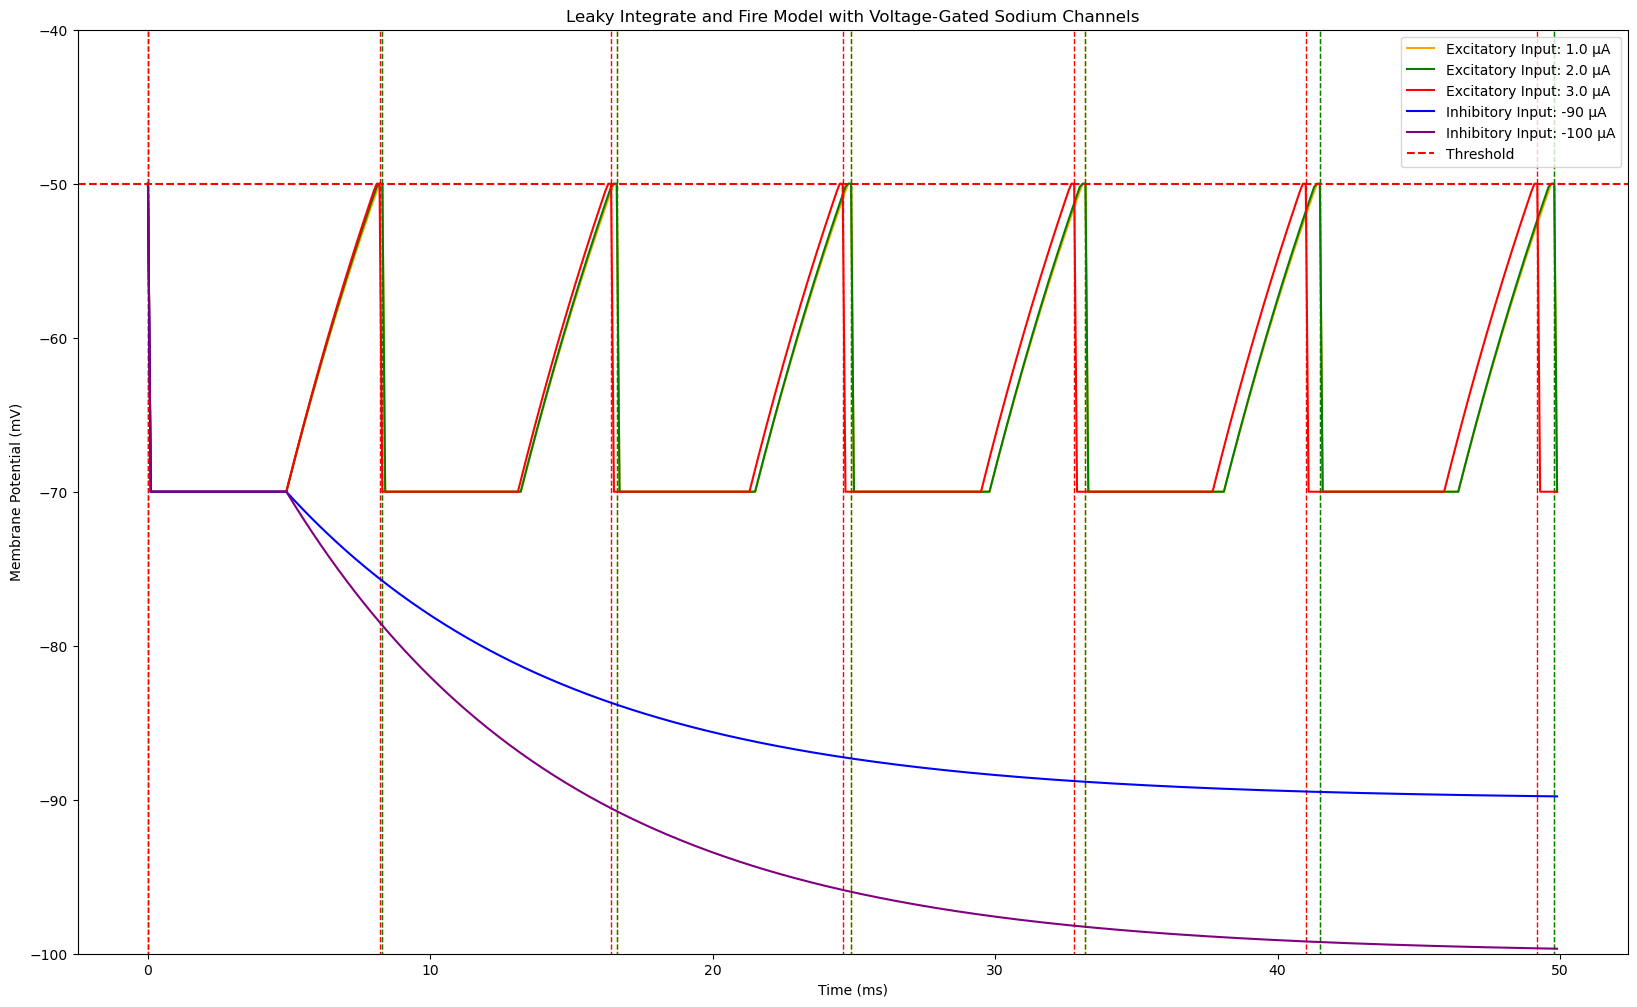

In [93]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_integrate_and_fire(current_inputs, membrane_time_constant, threshold_voltage, reset_voltage, simulation_time, dt, sodium_channel_threshold, refractory_period):
    time_points = np.arange(0, simulation_time, dt)
    membrane_potential = np.zeros_like(time_points)
    spike_times = []
    last_spike_time = -refractory_period

    for i, t in enumerate(time_points):
        if t - last_spike_time < refractory_period:
            membrane_potential[i] = reset_voltage
        elif membrane_potential[i-1] >= threshold_voltage:
            membrane_potential[i] = threshold_voltage
            spike_times.append(t)
            last_spike_time = t
        else:
            # Calculate total input current
            total_input = sum(current_inputs)

            # Calculate sodium current contribution
            sodium_current = 0.0
            if membrane_potential[i-1] >= sodium_channel_threshold:
                sodium_current = 10.0  # Arbitrary value representing sodium current

            # Update membrane potential with sodium current and input current
            membrane_potential[i] = membrane_potential[i-1] + (dt / membrane_time_constant) * (total_input - membrane_potential[i-1] + sodium_current)

            # Ensure membrane potential does not exceed threshold
            membrane_potential[i] = min(membrane_potential[i], threshold_voltage)

    return time_points, membrane_potential, spike_times

# Define parameters
excitatory_inputs = [1.0, 2.0, 3.0]  # Excitatory inputs
inhibitory_inputs = [-90, -100]      # Inhibitory inputs
membrane_time_constant = 10.0         # Time constant of the membrane
threshold_voltage = -50               # Membrane potential threshold for firing in mV
reset_voltage = -70                   # Membrane potential reset value after firing in mV
simulation_time = 50                  # Simulation time in milliseconds
dt = 0.1                              # Time step in milliseconds
sodium_channel_threshold = -40        # Threshold for opening sodium channels in mV
refractory_period = 5                 # Duration of the refractory period in milliseconds

plt.figure(figsize=(20, 12))

# Plot membrane potentials for excitatory inputs
for current_input, color, label in zip(excitatory_inputs, ['orange', 'green', 'red'], ['1.0', '2.0', '3.0']):
    time_points, membrane_potential, spike_times = leaky_integrate_and_fire([current_input], membrane_time_constant, threshold_voltage, reset_voltage, simulation_time, dt, sodium_channel_threshold, refractory_period)
    plt.plot(time_points, membrane_potential, label=f'Excitatory Input: {label} μA', color=color)

    # Plot action potentials as vertical lines with the same color as excitatory input lines
    for spike_time in spike_times:
        plt.axvline(x=spike_time, ymin=threshold_voltage, color=color, linestyle='--', linewidth=1)

# Plot membrane potentials for inhibitory inputs
for current_input, color, label in zip(inhibitory_inputs, ['blue', 'purple'], ['-90', '-100']):
    time_points, membrane_potential, _ = leaky_integrate_and_fire([current_input], membrane_time_constant, threshold_voltage, reset_voltage, simulation_time, dt, sodium_channel_threshold, refractory_period)
    plt.plot(time_points, membrane_potential, label=f'Inhibitory Input: {label} μA', color=color)

plt.title('Leaky Integrate and Fire Model with Voltage-Gated Sodium Channels')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.axhline(y=threshold_voltage, color='r', linestyle='--', label='Threshold')
plt.ylim([-100, threshold_voltage + 10])  # Set y-axis limits to -100 to threshold_voltage + 10 mV
plt.legend()
plt.show()



In this plot, we can see our original plot where the voltage rises and spikes above threshold. We also can see the inhibitory inputs which continuously drive voltage below the threshold. 

In this modified code, the excitatory and inhibitory inputs are defined as positive and negative values to represent excitatory and inhibitory current respectively, and the membrane potential is updated  in the leaky_integrate_and_fire function by subtracting the inhibitory input from the membrane potential update equation. Overall, it reflects the way inhibitory inputs act as they make the voltage farther away from the threshold which causes action potentials to not fire.

We can see by this diagram given to us by the lovely Dr. Steele, that inhibitory inputs do not tend to drive voltage until a plateau. Realistically, they are observed more as a variable up and down rollercoaster of vol:

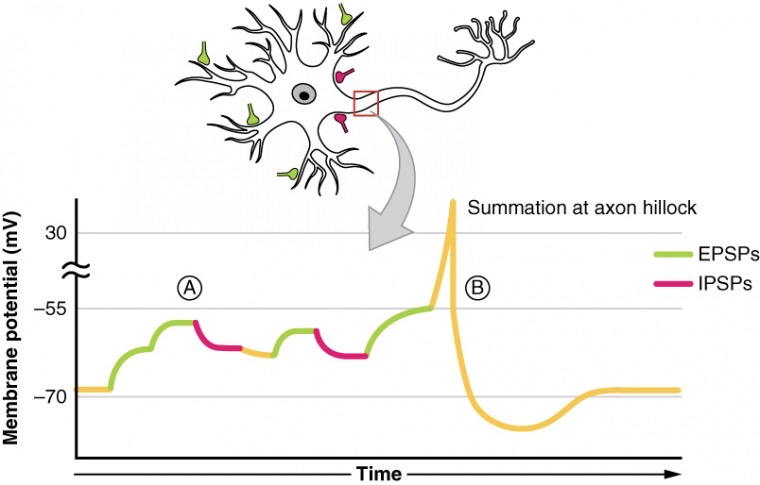


6. ## Artificial Intelligence:

**Artificial Intelligence (AI)** is when machines are made to act and think like humans. An AI is a computer program capable of doing any task a human would normally be required to perform. AI technology has grown exponentially over the past few decades, leading to advancements that once seemed impossible. It spans a wide range of applications, from simple calculators to complex decision-making systems that can outperform human cognitive abilities in specific tasks. The idea of AI has been prevalent in mythology and ancient history but only in the last century have scientists started making real progress in creating machines that can understand and learn on their own.

**Key Concepts:**
   
   * _Machine Learning_: This is a subset of Artificial Intelligence.
   * _Deep Learning_: A type of ML that uses neural networks with many layers. These networks are particularly powerful in handling large amounts of data and are the backbone of many AI applications, such as image and speech recognition.

**Applications:**
   
   * _Healthcare_: AI algorithms can help analyze medical images or genetic information, assisting in diagnosis.
   * _Finance_: AI is helpful in detecting financial fraud and can help with algorithmic trading as well as personalized customer service.
   * _Transportation_: Vehicles use AI to interpret sensor data in order to navigate safely.
   * _Manufacturing_: AI optimizes production lines (supply chain) and predicts maintenance needs




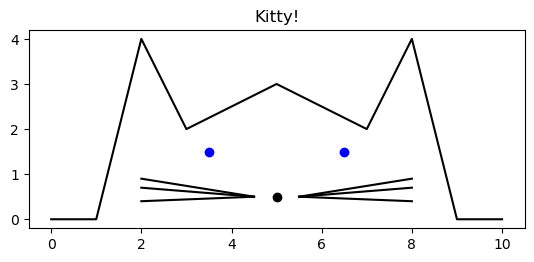

In [4]:
import matplotlib.pyplot as plt

# Define the points to plot for the cat
cat_x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cat_y = [0, 0, 4, 2, 2.5, 3, 2.5, 2, 4, 0, 0]

whiskerx = [5.5,8]
whiskery = [.5,.9]
whiskerx1 = [5.5,8]
whiskery1 = [.5,.7]
whiskerx2 = [5.5,8]
whiskery2 = [.5,.4]

whiskerx3 = [2,4.5]
whiskery3 = [.9,.5]
whiskerx4 = [2,4.5]
whiskery4 = [.7,.5]
whiskerx5 = [2,4.5]
whiskery5 = [.4,.5]

# Plot the cat
plt.plot(cat_x, cat_y, color='black')
plt.scatter(3.5,1.5, color = "blue")
plt.scatter(6.5,1.5,color = "blue")

plt.plot(whiskerx,whiskery, color = "black")
plt.plot(whiskerx1,whiskery1, color = "black")
plt.plot(whiskerx2,whiskery2, color = "black")

plt.plot(whiskerx3,whiskery3, color = "black")
plt.plot(whiskerx4,whiskery4, color = "black")
plt.plot(whiskerx5,whiskery5, color = "black")

plt.scatter(5,.5, color = "black")

plt.title('Kitty!')

plt.gca().set_aspect('equal', adjustable='box')
plt.show()